In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample


def percentage(x):return f"{round(100*x,4)}%"

In [2]:
# #generate data
# m = 10000
# x_train = np.random.rand(m)
# y_train = np.logical_and(x_train>0.5,x_train<0.75).astype(np.int16)

# x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))


# print(x_y)

### Generating an unbiased data set
We need to have %50 : 50%  positives:negatives

In [3]:
m = 1000

pos_x = 0.25 + 0.5 * np.random.rand(m//2)
neg_x1 = 0 + 0.25 * np.random.rand(m//4)
neg_x2 = 0.75 + 0.25 * np.random.rand(m//4)
neg_x = np.concatenate((neg_x1,neg_x2))

x_train = np.concatenate((pos_x,neg_x))
y_train = np.logical_and(x_train>0.25,x_train<0.75).astype(np.int16)

x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
print(x_y)

[[0.28300979 1.        ]
 [0.40503855 1.        ]
 [0.64503305 1.        ]
 ...
 [0.81009543 0.        ]
 [0.84052397 0.        ]
 [0.79193033 0.        ]]


### Noise to inputs

In [4]:
#introduce some noise in to x_train
if 'need noise to x_train':
    noise =  0.1 * (2*np.random.rand(len(x_train))-1)
    x_train += noise

### Train the weights

initial: -0.6859871763907754 -0.6493637635696303 0.10257076247448604 -0.7793769875860086 0.31632287621457156 0.2829063953125781 -0.21064724035959803
final: -10.78474286047127 -10.46275678355007 7.92738146163158 2.762543086365888 14.177956185319863 -14.295726769926121 -6.47573353662934


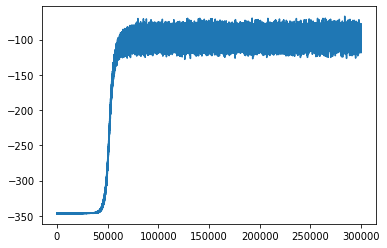

In [5]:
x_train_all, y_train_all = x_train, y_train

def sigmoid(t):return 1/(1+np.exp(-t))

w1,w2,b1,b2,theta1,theta2,k = 2*np.random.rand(7)-1
    
print("initial:", w1,w2,b1,b2,theta1,theta2,k)
n_iter = 3_00_000

L_history = []
x_train_indices = list(range(len(x_train_all)))

for _ in range(n_iter):
    samples = sample(x_train_indices,500)
    x_train = x_train_all[samples]
    y_train = y_train_all[samples]
    
    
    z1 = sigmoid(w1*x_train+b1)
    z2 = sigmoid(w2*x_train+b2)
    A =  sigmoid(theta1*z1+theta2*z2+k)
    diff = y_train-A
    
    # L = log of joint likelihood
    L = (y_train * np.log(A) + (1-y_train) * np.log(1 -A)).sum()
    L_history.append(L)
    # need to maximize
    dL_dk = diff.sum()
    dL_dtheta1 = (diff * z1).sum()
    dL_dtheta2 = (diff * z2).sum()
    dL_db1 = (diff * theta1 * z1 * (1-z1) ).sum()
    dL_db2 = (diff * theta2 * z2 * (1 -z2) ).sum()
    dL_dw1 = (diff * theta1 * z1 * (1-z1) * x_train ).sum()
    dL_dw2 = (diff * theta2 * z2 * (1-z2) * x_train ).sum()
    
    
    #gradient accent
    lr = 1e-1/m
    
    w1 += lr * dL_dw1
    w2 += lr * dL_dw2
    b1 += lr * dL_db1
    b2 += lr * dL_db2
    theta1 += lr * dL_dtheta1
    theta2 += lr * dL_dtheta2
    k +=  lr * dL_dk
    


print("final:", w1,w2,b1,b2,theta1,theta2,k)

plt.plot(L_history)

In [6]:
z1 = sigmoid(w1*x_train+b1)
z2 = sigmoid(w2*x_train+b2)
A =  sigmoid(theta1*z1+theta2*z2+k)

y_hat = (A>0.5)

print("Accuracy:",percentage(np.sum(y_hat == y_train)/len(y_train)))

Accuracy: 92.4%


In [7]:
x_set = [i/100 for i in range(0,100,4)]

for x in x_set:
    z1 = sigmoid(w1*x+b1)
    z2 = sigmoid(w2*x+b2)
    A =  sigmoid(theta1*z1+theta2*z2+k)
    print(x , "is between 0.25 and 0.75: ------------>" , A>0.5, "( A= ", A, ")")

0.0 is between 0.25 and 0.75: ------------> False ( A=  0.003173614213302854 )
0.04 is between 0.25 and 0.75: ------------> False ( A=  0.004726149499060741 )
0.08 is between 0.25 and 0.75: ------------> False ( A=  0.008272387676732627 )
0.12 is between 0.25 and 0.75: ------------> False ( A=  0.01765108457513205 )
0.16 is between 0.25 and 0.75: ------------> False ( A=  0.0464831771473543 )
0.2 is between 0.25 and 0.75: ------------> False ( A=  0.1420344276854108 )
0.24 is between 0.25 and 0.75: ------------> False ( A=  0.39952447547138387 )
0.28 is between 0.25 and 0.75: ------------> True ( A=  0.7399908582180722 )
0.32 is between 0.25 and 0.75: ------------> True ( A=  0.9190682829226245 )
0.36 is between 0.25 and 0.75: ------------> True ( A=  0.9740393675177399 )
0.4 is between 0.25 and 0.75: ------------> True ( A=  0.9895738041432247 )
0.44 is between 0.25 and 0.75: ------------> True ( A=  0.994402715068819 )
0.48 is between 0.25 and 0.75: ------------> True ( A=  0.9959280

### Results
Working super fine!\
Amazed by the accuracy:0.9992\
initial: -0.5076032176681249 -0.5161888079115744 -0.9797721258983405 0.3336572105934692 0.8192428213010876 0.8926597729557344 -0.9298152054573068
final: 21.743688970058535 -19.471327134725342 -5.59964282207095 14.43136556327099 16.785498226736504 16.844912960073945 -24.55654851478536

In [8]:
A = np.array([1,2,3,4,5])
A[[1,2,3]]

array([2, 3, 4])